## ASSIGNMENT 3 - Take Any dataset of your choice and do the visualization

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

### Explore the Dataset

In [35]:
# To Show first few rows
print(df.head())

# To show basic statistics
print(df.describe())

#  To Display information about the dataset
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality AlcoholCategory  
0      9.4        5             Low  
1      9.8

###  Data Cleaning and Filtering

In [15]:
# To Check if there is any missing values
print(df.isnull().sum())

# Fill missing values (if any) with the mean of the column
df.fillna(df.mean(), inplace=True)

# To Display the cleaned data
print(df.info())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   su

### Adding and Modifying Columns

In [23]:
# Add a new column for alcohol content category
df['AlcoholCategory'] = pd.cut(df['alcohol'], bins=[0, 10, 12, 15], labels=['Low', 'Medium', 'High'])

### Grouping and Aggregating Data

In [25]:
# Group by 'AlcoholCategory' and calculate average quality
grouped_data = df.groupby('AlcoholCategory')['quality'].mean()
print(grouped_data)


AlcoholCategory
Low       5.295850
Medium    5.834037
High      6.439716
Name: quality, dtype: float64


C:\Users\jagri\AppData\Local\Temp\ipykernel_4036\1285892865.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('AlcoholCategory')['quality'].mean()


### Visualization

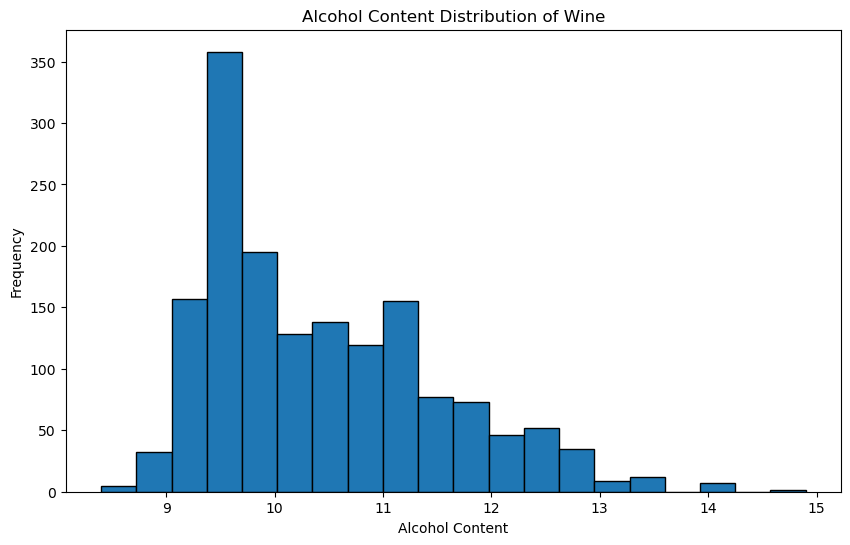

<Figure size 1000x600 with 0 Axes>

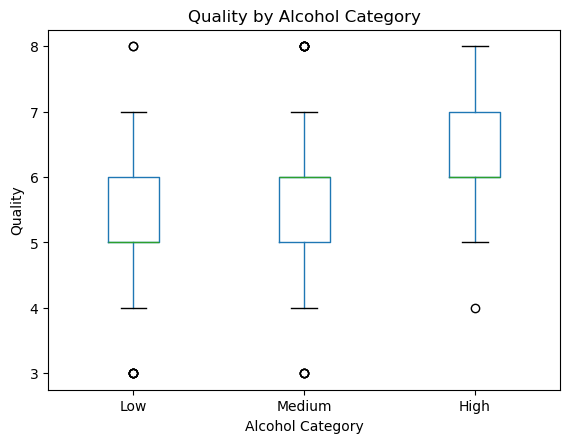

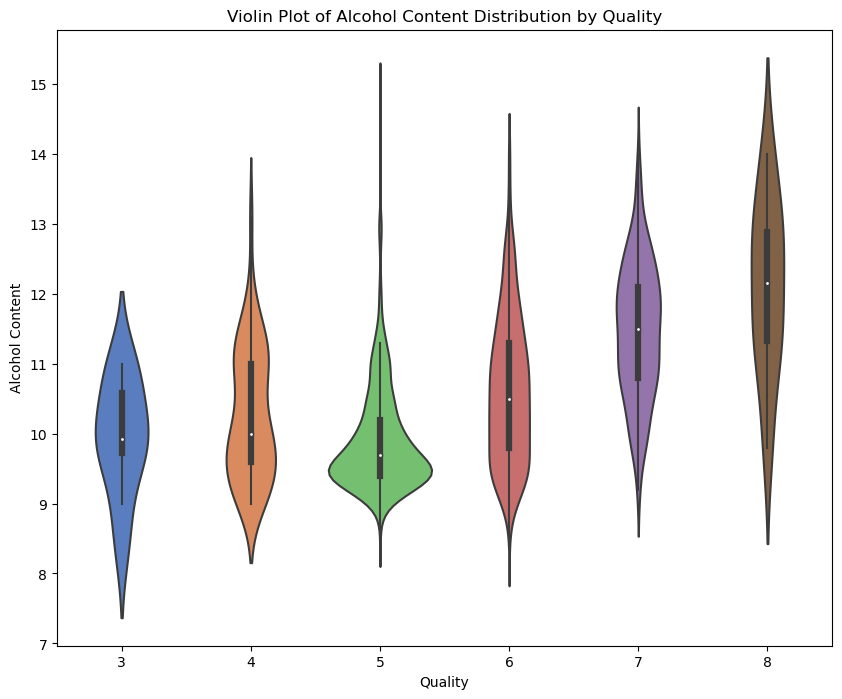

In [72]:

# Histogram of alcohol content
plt.figure(figsize=(10, 6))
plt.hist(df['alcohol'], bins=20, edgecolor='black')
plt.title('Alcohol Content Distribution of Wine')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

# Box plot of quality by alcohol category
plt.figure(figsize=(10, 6))
df.boxplot(column='quality', by='AlcoholCategory', grid=False)
plt.title('Quality by Alcohol Category')
plt.xlabel('Alcohol Category')
plt.ylabel('Quality')
plt.suptitle('')  
plt.show()


# Violin plot of alcohol content distribution by quality
plt.figure(figsize=(10, 8))
sns.violinplot(x='quality', y='alcohol', data=df, palette='muted')
plt.title('Violin Plot of Alcohol Content Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()



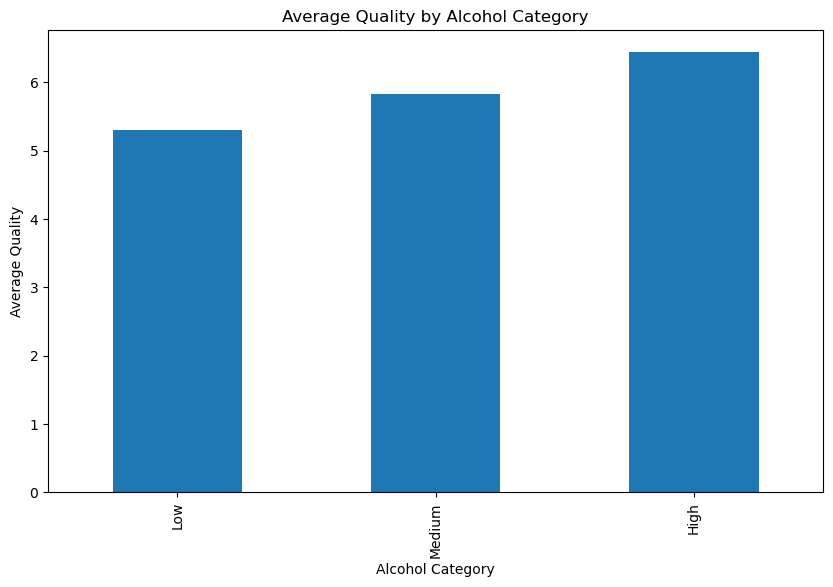

In [68]:
# Bar plot of average quality by alcohol category
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Average Quality by Alcohol Category')
plt.xlabel('Alcohol Category')
plt.ylabel('Average Quality')
plt.show()

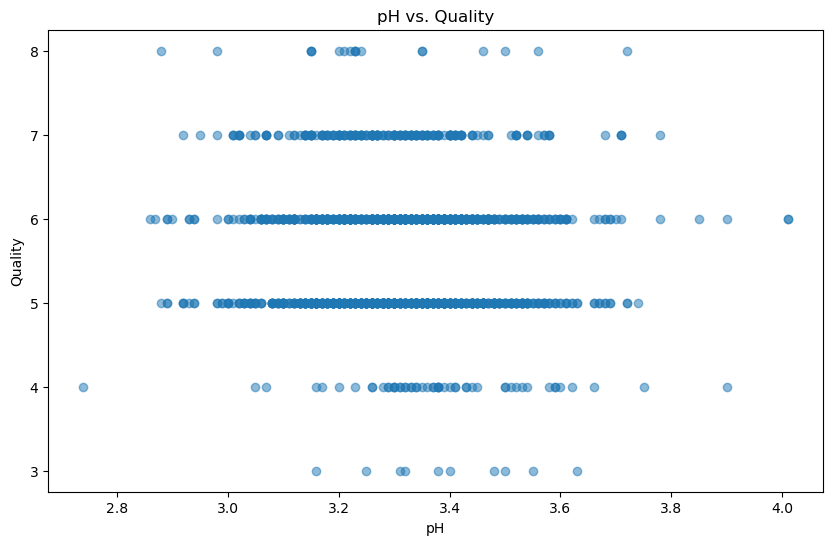

In [70]:
# Scatter plot of pH vs. quality
plt.figure(figsize=(10, 6))
plt.scatter(df['pH'], df['quality'], alpha=0.5)
plt.title('pH vs. Quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

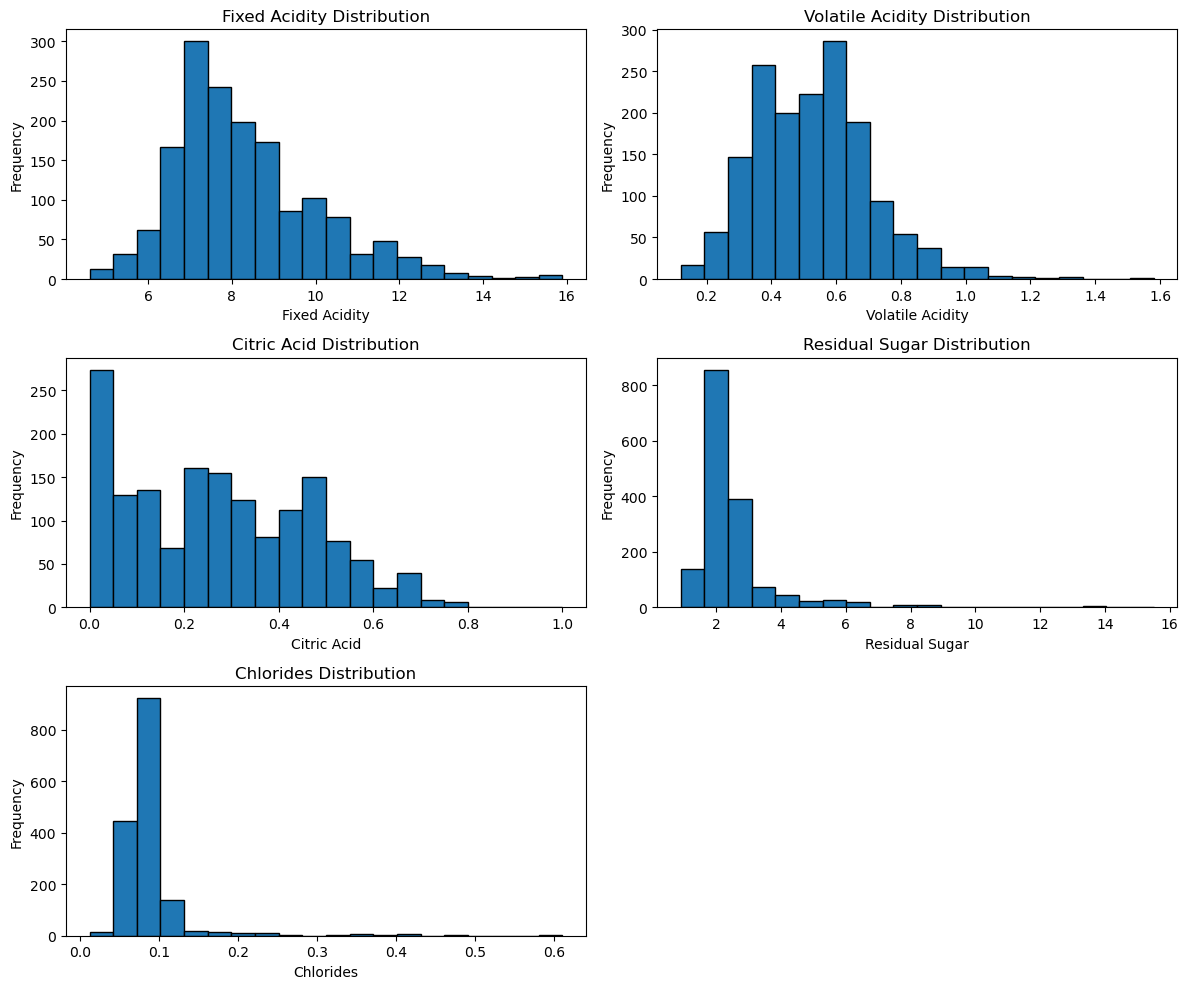

In [52]:
# Histogram of various wine features
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.hist(df['fixed acidity'], bins=20, edgecolor='black')
plt.title('Fixed Acidity Distribution')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.hist(df['volatile acidity'], bins=20, edgecolor='black')
plt.title('Volatile Acidity Distribution')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.hist(df['citric acid'], bins=20, edgecolor='black')
plt.title('Citric Acid Distribution')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.hist(df['residual sugar'], bins=20, edgecolor='black')
plt.title('Residual Sugar Distribution')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.hist(df['chlorides'], bins=20, edgecolor='black')
plt.title('Chlorides Distribution')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


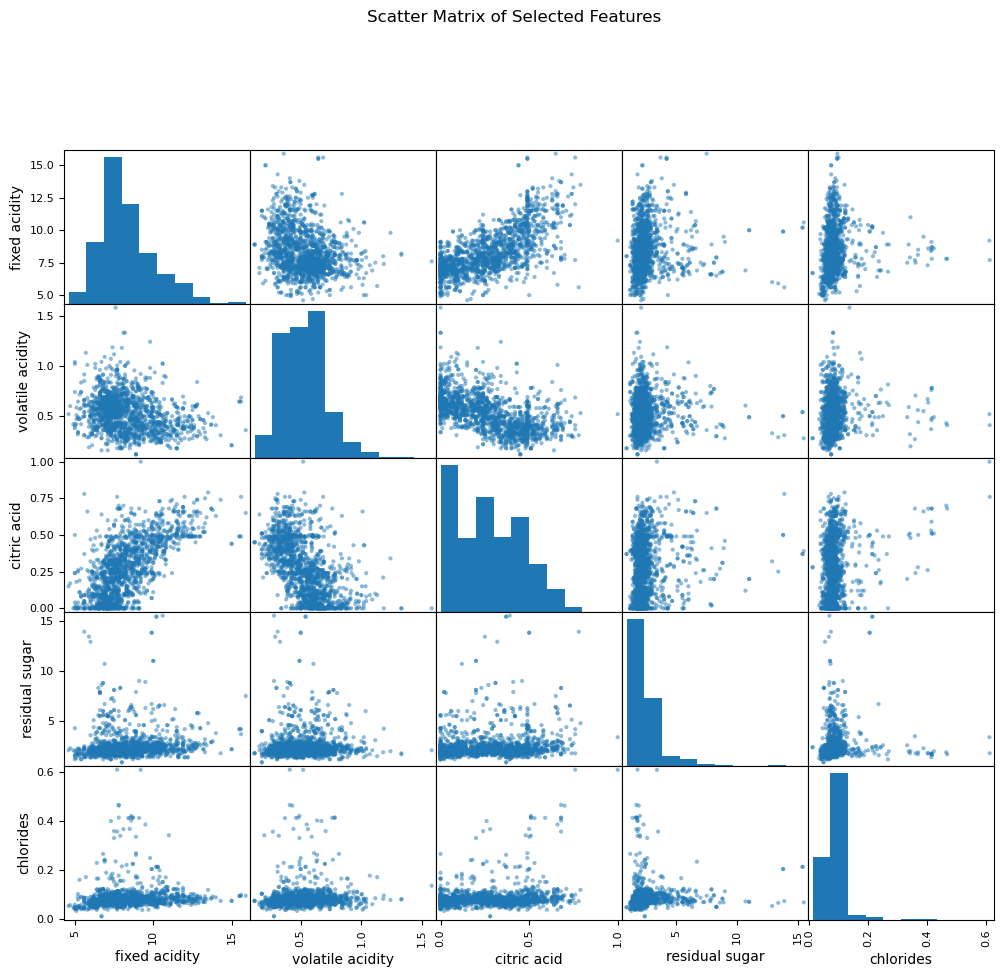

In [56]:
from pandas.plotting import scatter_matrix

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
scatter_matrix(df[features], figsize=(12, 10))
plt.suptitle('Scatter Matrix of Selected Features', y=1.02)
plt.show()


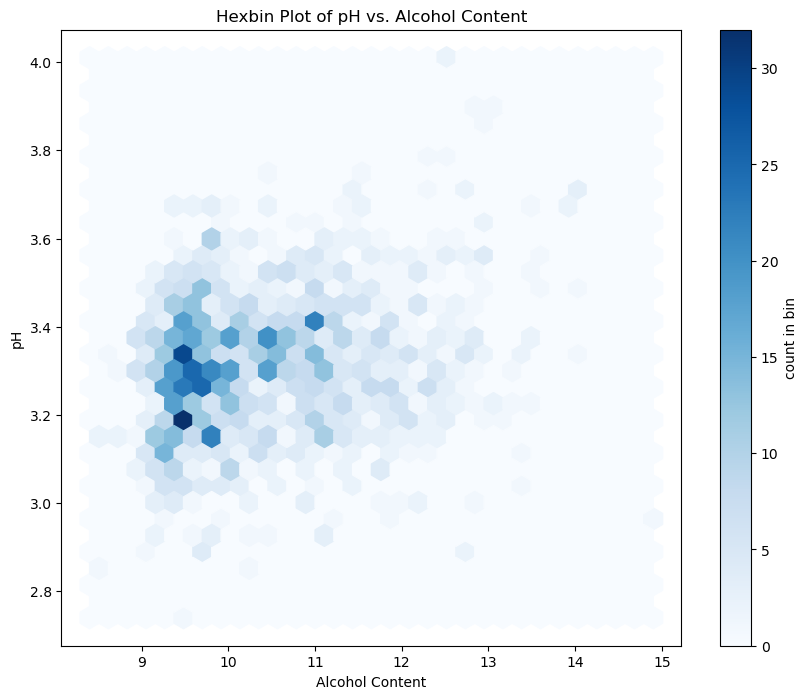

In [60]:
# Hexbin plot of pH vs. alcohol content
plt.figure(figsize=(10, 8))
plt.hexbin(df['alcohol'], df['pH'], gridsize=30, cmap='Blues')
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot of pH vs. Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.show()


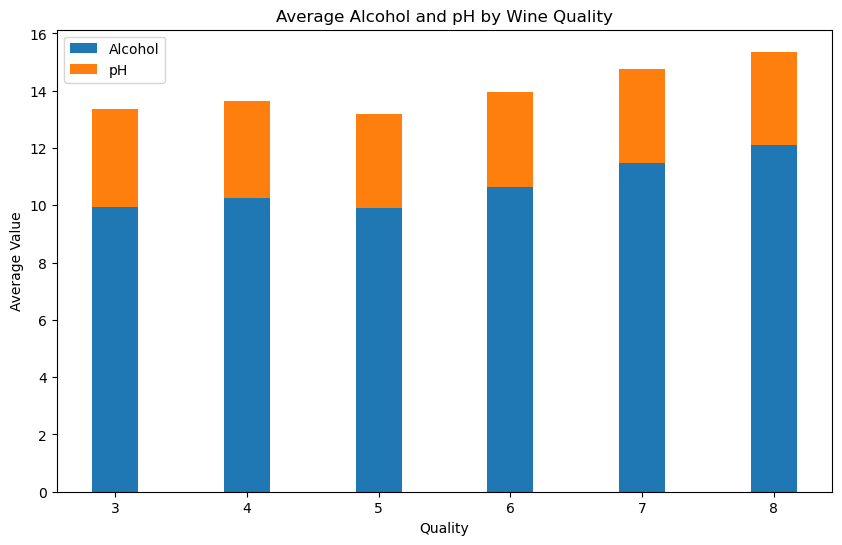

In [62]:
# Group by quality and calculate mean alcohol and pH
quality_stats = df.groupby('quality')[['alcohol', 'pH']].mean()

# Stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = quality_stats.index
plt.bar(index, quality_stats['alcohol'], width=bar_width, label='Alcohol')
plt.bar(index, quality_stats['pH'], width=bar_width, label='pH', bottom=quality_stats['alcohol'])
plt.title('Average Alcohol and pH by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(index)
plt.show()


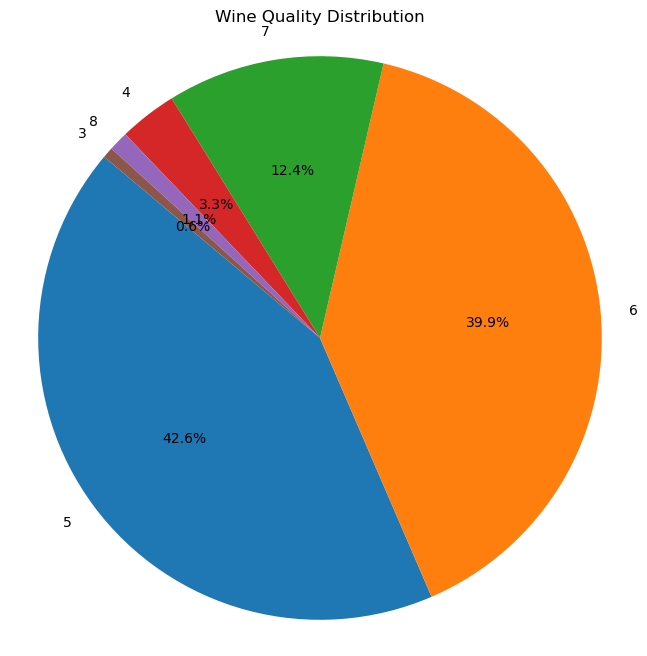

In [64]:
import matplotlib.pyplot as plt


quality_counts = df['quality'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Wine Quality Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


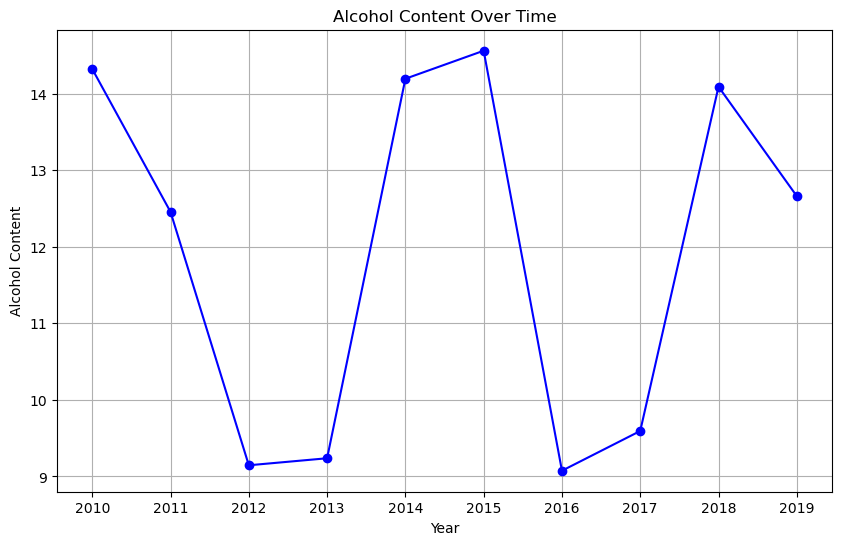

In [66]:
import numpy as np


years = np.arange(2010, 2020)
alcohol_content = np.random.uniform(8, 15, size=10)

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(years, alcohol_content, marker='o', linestyle='-', color='b')
plt.title('Alcohol Content Over Time')
plt.xlabel('Year')
plt.ylabel('Alcohol Content')
plt.grid(True)
plt.xticks(years)
plt.show()
